In [2]:
import torch
# from vit_pytorch import ViT
import torch.nn as nn
from model import MyViT
from torch.utils.data import DataLoader, random_split, Dataset

In [3]:
# Set the seed for PyTorch
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [4]:
torch.cuda.is_available()

True

In [5]:
import torch
# from vit_pytorch import ViT

vit_model = MyViT(
    image_size = 28,
    patch_size = 4,
    num_classes = 1000,
    dim = 1028,
    depth = 6,
    heads = 6,
    mlp_dim = 1028 * 3,
    dropout = 0,
    # dropout = 0.1,
    emb_dropout = 0,
    # emb_dropout = 0.1,
    channels = 1
)

img = torch.randn(1, 1, 28, 28)

# BIG
# preds = v(img) # (1, 1000)
# import torch
# # from vit_pytorch import ViT

# vit_model = MyViT(
#     image_size = 28,
#     patch_size = 7,
#     num_classes = 1000,
#     dim = 2056,
#     depth = 4,
#     heads = 6,
#     mlp_dim = 2056 * 3,
#     dropout = 0,
#     # dropout = 0.1,
#     emb_dropout = 0,
#     # emb_dropout = 0.1,
#     channels = 1
# )

# img = torch.randn(1, 1, 28, 28)

# # preds = v(img) # (1, 1000)

16


In [6]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

total_params = count_parameters(vit_model)
print(f'Total number of parameters: {total_params}')


Total number of parameters: 48694324


In [7]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# # Download and load the test data
# testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [8]:
import torch.utils
import torch.utils.data


train_size = 128
train_dataset, test_dataset = random_split(trainset, [train_size, len(trainset) - train_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True)

In [9]:
sample_images = next(iter(trainloader))[0]
test_samples  = next(iter(test_loader))[0]

In [10]:
import matplotlib.pyplot as plt
import torch

def print_images(images):
    """
    Prints a batch of images with shape (64, 1, 28, 28).

    Parameters:
    images (torch.Tensor): A tensor of shape (64, 1, 28, 28) containing the images to be printed.
    """
    # Ensure the input is a 4D tensor
    assert images.ndim == 4, "Input tensor must be 4-dimensional"
    assert images.shape[1] == 1, "Input tensor must have a single channel"
    
    # Get the number of images in the batch
    batch_size = images.shape[0]
    
    # Define the number of rows and columns for the plot grid
    n_cols = 8
    n_rows = (batch_size + n_cols - 1) // n_cols
    
    # Create a figure to hold the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 1.5))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    for i in range(batch_size):
        # Get the image and remove the channel dimension
        img = images[i, 0, :, :].numpy()
        
        # Plot the image
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')
    
    # Remove any remaining empty subplots
    for i in range(batch_size, len(axes)):
        axes[i].axis('off')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [11]:
# print_images(sample_images)
# with torch.no_grad():
#     print_images(output)

In [12]:
checkpoint_path = './jack/epoch_105000_model_0.00008259.pth'
import os
if not os.path.isfile(checkpoint_path):
    raise FileNotFoundError(f"Checkpoint file '{checkpoint_path}' not found")

In [22]:
vit_model.load_state_dict(torch.load(checkpoint_path))
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vit_model.to(device)


/tmp/ipykernel_3173417/1885985901.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vit_model.load_state_dict(torch.load(checkpoint_path))


MyViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=4, p2=4)
    (1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=16, out_features=1028, bias=True)
    (3): LayerNorm((1028,), eps=1e-05, elementwise_affine=True)
  )
  (to_patch_embedding_inverse): Sequential(
    (0): LayerNorm((1028,), eps=1e-05, elementwise_affine=True)
    (1): Linear(in_features=1028, out_features=16, bias=True)
    (2): Rearrange('b (h w) (p1 p2 c) -> b c (h p1) (w p2)', p1=4, p2=4, w=7, h=7, c=1)
  )
  (dropout): Dropout(p=0, inplace=False)
  (transformer): Transformer(
    (norm): LayerNorm((1028,), eps=1e-05, elementwise_affine=True)
    (layers): ModuleList(
      (0-5): 6 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((1028,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (dropout): Dropout(p=0, inplace=False)
          (to_qkv): Linear(in_features=1028, out_featur

In [18]:
import torch.optim as optim
import torch
from tqdm import tqdm
import time
from jacobian import JacobianReg


# Check if GPU is available and use it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')

# Define loss function and optimizer
criterion = nn.MSELoss()
# optimizer = optim.Adam(vit_model.parameters(), lr=0.001)
# milestones = [3000, 6000, 8000, 1000, 12000, 14000, 17000]

optimizer = optim.Adam(vit_model.parameters(), lr=0.00011)
reg = JacobianReg() # Jacobian regularization
lambda_JR = 0.000_001 # hyperparameter
# optimizer = optim.Adam(vit_model.parameters(), lr=0.00000015)

# Define the learning rate scheduler
milestones = [150000]
milestones = [1000, 2000, 3000, 20000, 14000, 17000]
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.6)

# Move the model to the GPU
vit_model.to(device)

num_epochs = 1_600_000

# Parameters for Gaussian noise
mean = 0
std_dev = 0.01  # Standard deviation (adjust as needed)



# Training loop
def train_model(model, optimizer, scheduler, dataloader, target_loss=1e-8):
    model.train()
    with tqdm(total=num_epochs, desc="Processing") as pbar:
        for epoch in range(num_epochs):
            running_loss = 0.0
            for images, _ in dataloader:
                # Move the images to the GPU
                images = images.to(device)
                images.requires_grad = True # this is essential!
                optimizer.zero_grad()
                # Add Gaussian noise
                # noises = torch.normal(mean, std_dev, size=images.shape).to(device)
                # noisy_images = images + noises
                # outputs = model(noisy_images)
                outputs = model(images)
                

                loss_super = criterion(outputs, images) # supervised loss
                R = reg(images, outputs.reshape(images.shape[0], -1))   # Jacobian regularization
                loss = loss_super + lambda_JR*R # full loss
                # loss = criterion(outputs, images)
                loss.backward()

                optimizer.step()

                running_loss += loss.item()

            avg_loss = running_loss / len(dataloader)
            pbar.set_postfix({'Loss:': f'{avg_loss}'})
            pbar.update(1)

            # Step the scheduler
            scheduler.step()
            # if epoch % 400 == 0 and epoch != 0:
            #     time.sleep(90)

            if epoch % 15000 == 0 and epoch != 0:
                torch.save(model.state_dict(), f'./jack/epoch_{epoch}_model_{avg_loss:.8f}.pth')

            # Save intermediate models
            if avg_loss <= target_loss:
                torch.save(model.state_dict(), f'./jack/model_{avg_loss:.8f}.pth')
                break

# Train the model
train_model(vit_model, optimizer, scheduler, train_loader)


Processing:   0%|          | 46/1600000 [00:07<72:13:18,  6.15it/s, Loss:=6.4611053466796875]


KeyboardInterrupt: 

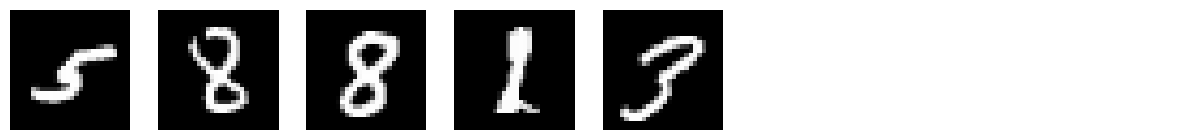

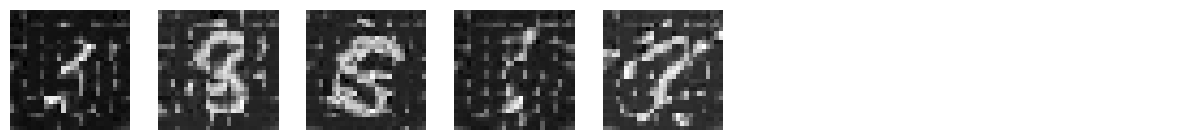

In [25]:
for images, _ in train_loader:
    # Move the images to the GPU
    images = images.to(device)
    # Add Gaussian noise
    # noises = torch.normal(mean, std_dev, size=images.shape).to(device)
    # noisy_images = images + noises
    # outputs = vit_model(images)
    with torch.no_grad():
        print_images(images[:5,:,:].cpu())
        outputs = vit_model(images[:5,:,:].to(device)).cpu()
        for i in range(100):
            outputs = vit_model(outputs[:5,:,:].to(device)).cpu()
    print_images(outputs[:5,:,:].cpu())
    
    # loss = criterion(outputs, images)

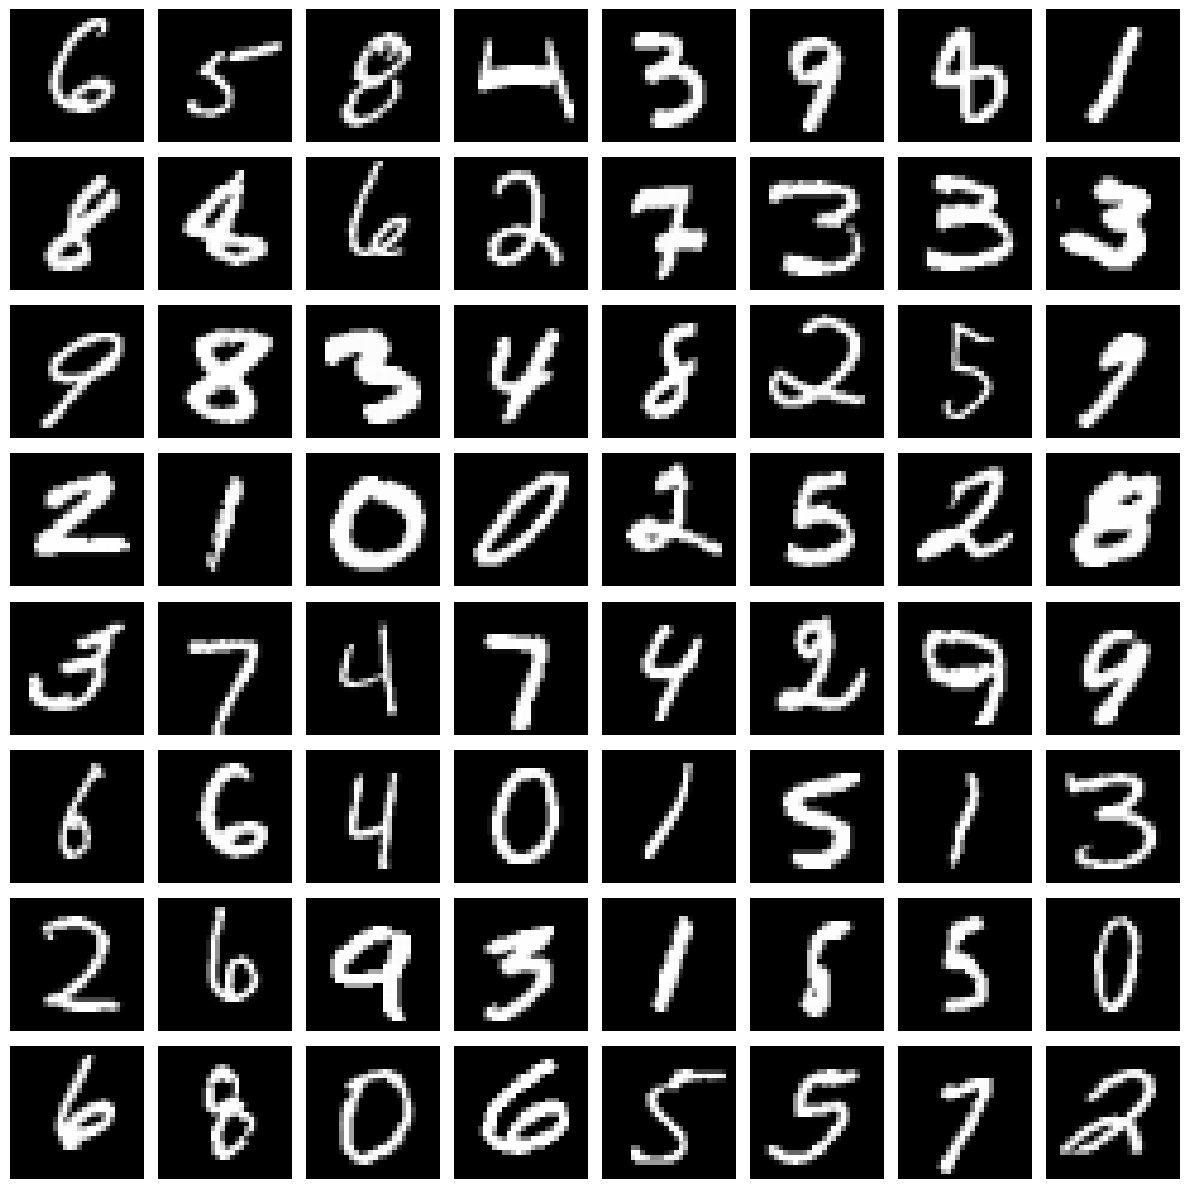

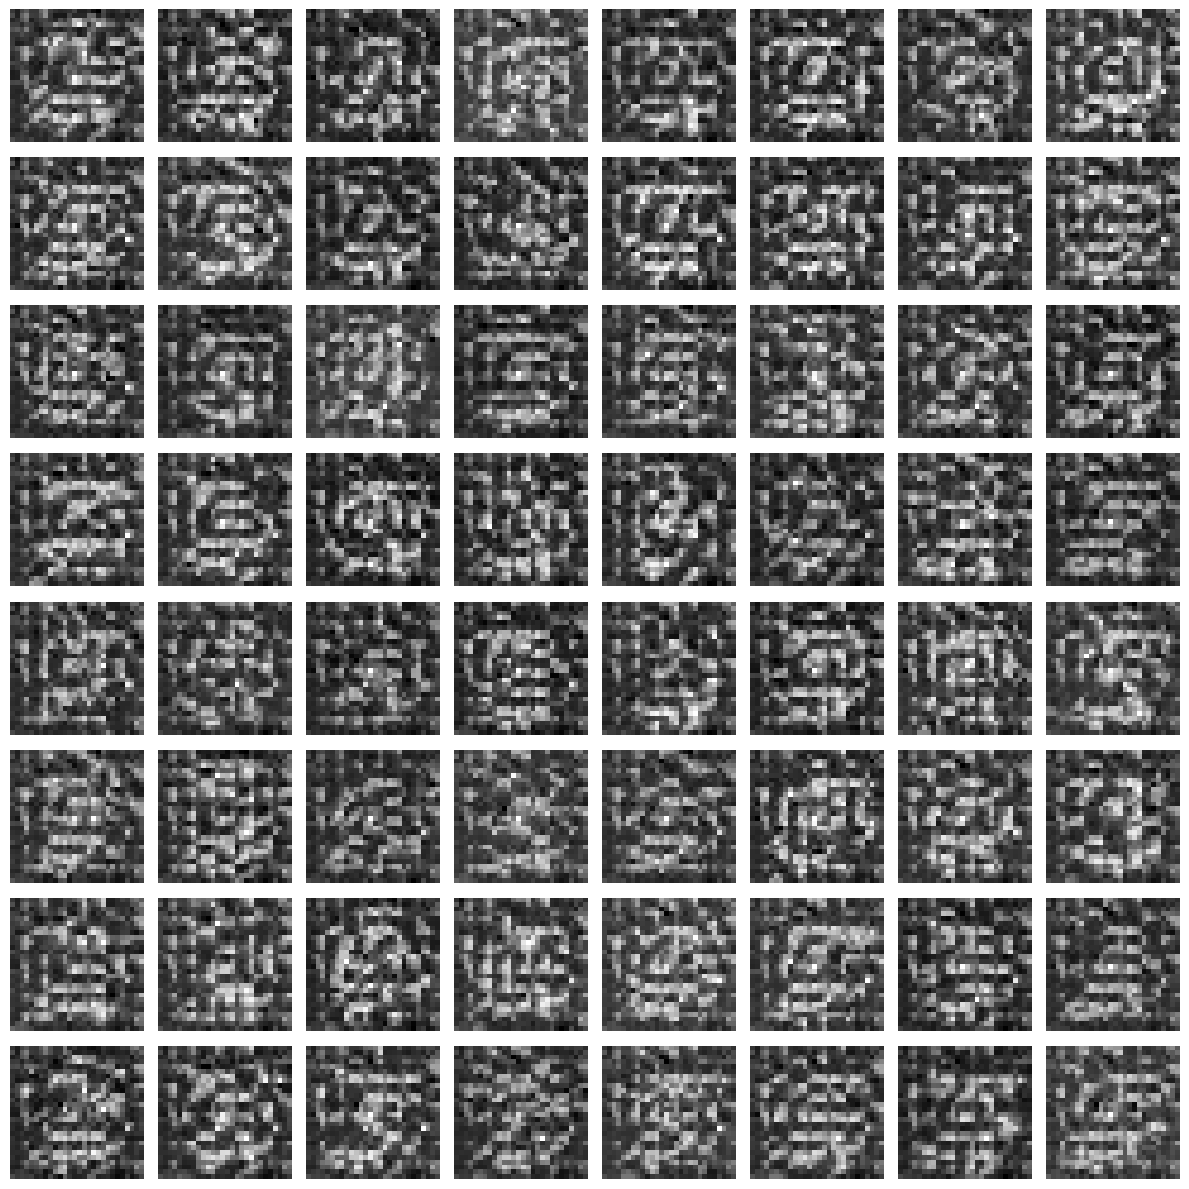

In [30]:
print_images(sample_images[:,:,:])
with torch.no_grad():
    samples = vit_model(sample_images[:,:,:].to(device)).cpu()
    for i in range(100):
        samples = vit_model(samples.to(device)).cpu()
    print_images(samples)

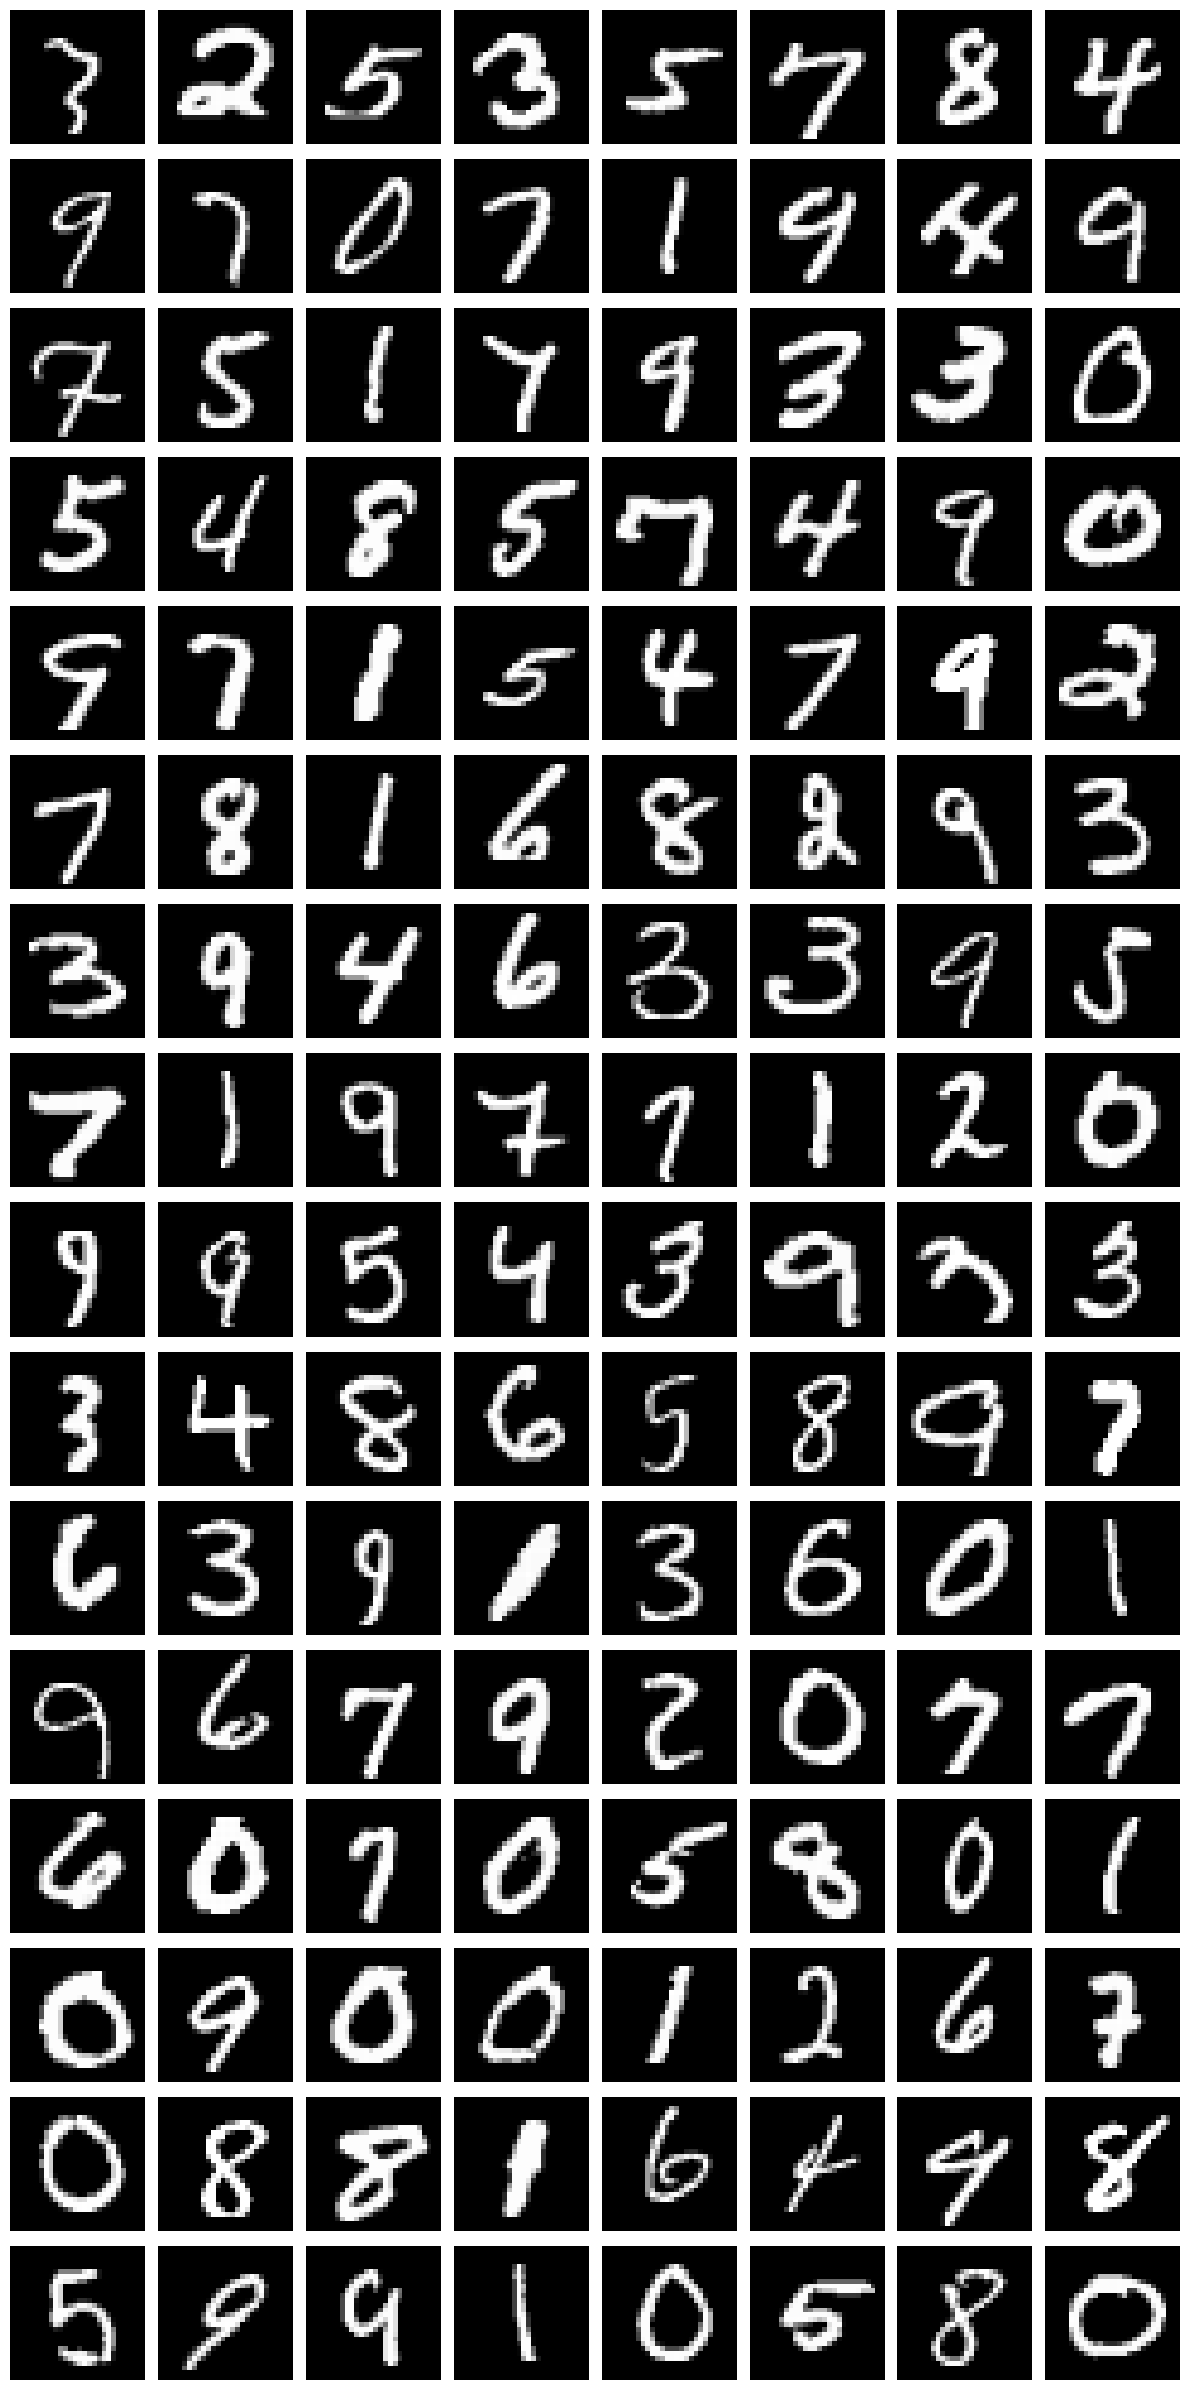

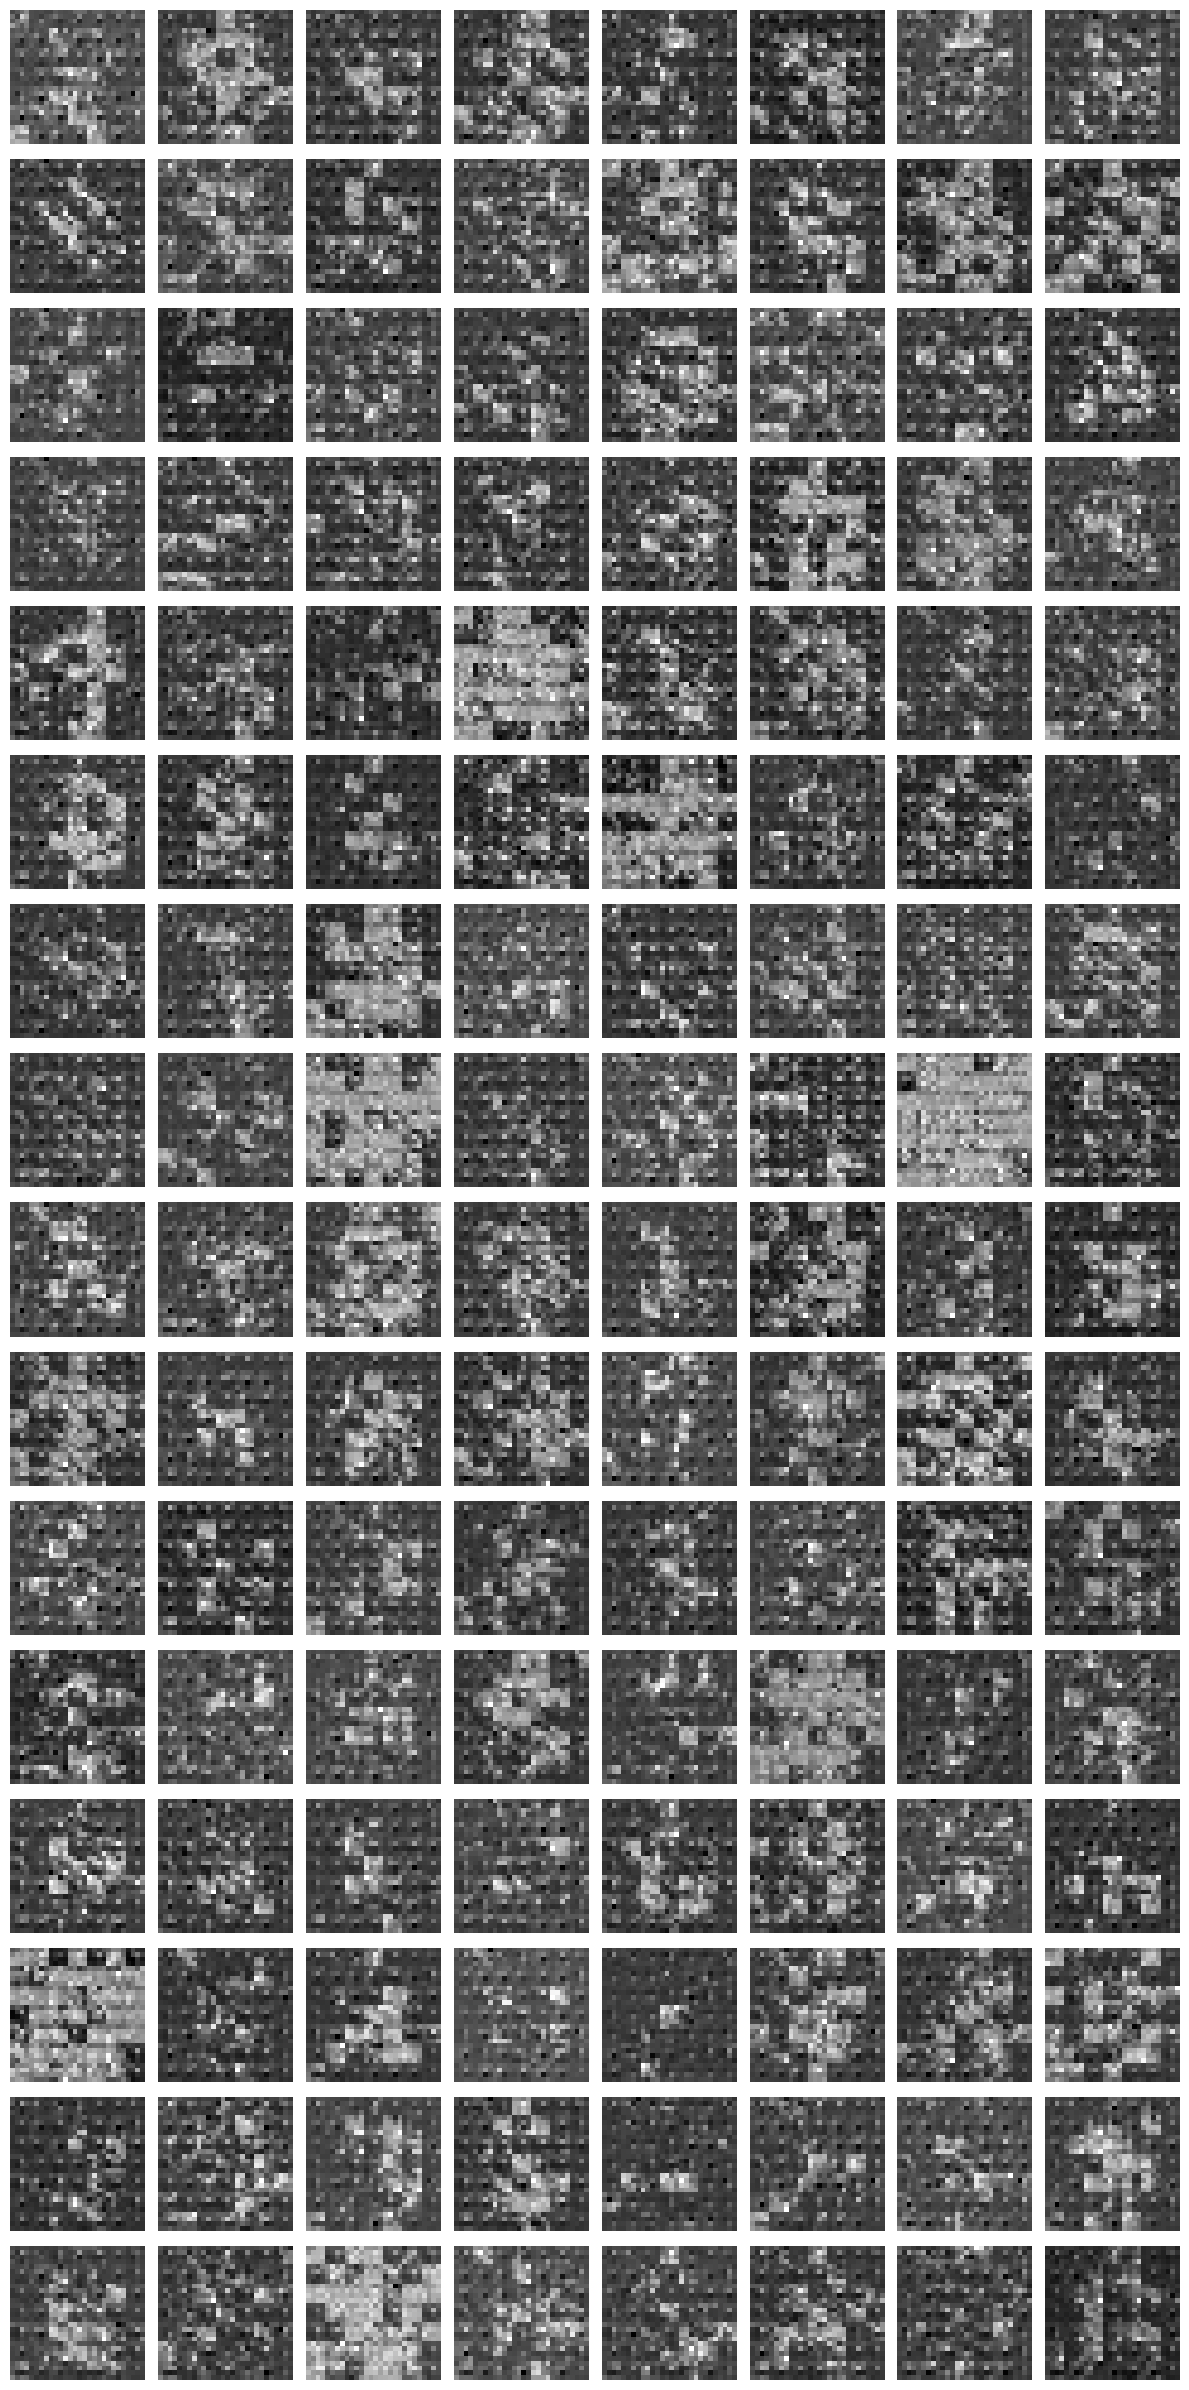

In [30]:
print_images(test_samples[:,:,:])
with torch.no_grad():
    samples = vit_model(test_samples[:,:,:].to(device)).cpu()
    for i in range(100):
        samples = vit_model(samples.to(device)).cpu()
    print_images(samples)

In [ ]:
sample = sample_images[-1:,:,:]
print_images(sample)
for i in range(400):
    with torch.no_grad():
        sample = vit_model(sample.to(device)).cpu()
    print_images(sample)

In [ ]:
vit_model(sample_images[0:,:,:].to(device)).cpu()

tensor([[[[-0.9923, -1.0516, -1.0054,  ..., -1.0225, -1.0183, -1.0417],
          [-1.0289, -1.0257, -1.0128,  ..., -1.0009, -1.0455, -1.0055],
          [-1.0540, -1.0372, -1.0315,  ..., -1.0378, -1.0218, -1.0426],
          ...,
          [-0.9892, -0.9842, -1.0207,  ..., -1.0042, -0.9959, -1.0004],
          [-1.0069, -1.0215, -1.0342,  ..., -0.9934, -1.0698, -0.9955],
          [-0.9524, -1.0267, -1.0182,  ..., -1.0264, -1.0129, -1.0689]]],


        [[[-1.0186, -1.0049, -0.9692,  ..., -1.0130, -0.9817, -0.9786],
          [-1.0243, -0.9947, -1.0008,  ..., -0.9980, -1.0034, -0.9893],
          [-0.9740, -0.9886, -0.9901,  ..., -0.9829, -1.0036, -1.0032],
          ...,
          [-0.9622, -1.0254, -0.9906,  ..., -0.9463, -1.0058, -1.0224],
          [-1.0077, -1.0302, -1.0268,  ..., -1.0370, -0.9975, -1.0199],
          [-1.0316, -1.0033, -0.9936,  ..., -1.0175, -0.9850, -1.0080]]],


        [[[-1.0215, -1.0251, -1.0237,  ..., -1.0468, -1.0003, -1.0047],
          [-0.9877, -1.071